In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import geopandas as gpd
# from geopandas import io
# import geodatasets
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from dateutil.relativedelta import relativedelta


In [138]:
# import os
# os.getcwd()
# os.chdir("C:\\Users\cathy\OneDrive\Documents\STAT-390-Project\MCMF")

In [4]:
data = pd.read_csv('data_cleaned.csv')
data.head()

/var/folders/tx/ccgvwwd562sfhw5ybj094vxc0000gn/T/ipykernel_98777/1908207649.py:1: DtypeWarning: Columns (14,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_cleaned.csv')


,Unnamed: 0,index_row,id,program_name,description,org_name,category_name,capacity,min_age,max_age,...,wed_end_time,wed_start_time,program_price,geographic_cluster_name,program_pays_participants,program_has_scholarships,program_provides_transportation,latitude,longitude,program_provides_free_food
0,0,"4,568",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,academic_support,2000.0,7,15,...,NaN,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,1,"4,569",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,work_career,2000.0,7,15,...,NaN,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,2,"4,562",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,academic_support,100.0,12,18,...,NaN,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,3,"4,563",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,music_art,100.0,12,18,...,NaN,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,4,"4,557",78746,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,managing_money,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


In [139]:
#train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [140]:
#train_data

In [7]:
def count_programs_by_features(data, features):
    # Extract the month and year from the start_date column
    data['start_date'] = pd.to_datetime(data['start_date'])
    data['month'] = data['start_date'].dt.month
    data['year'] = data['start_date'].dt.year
    
    features_with_month = features + ['month', 'year']
    
#     # Filter by geographic cluster
#     df = pd.DataFrame()
#     for i in range(len(input.cluster())):
#         x = data[data["geographic_cluster_name"] == str(input.cluster()[i])]
#         df = pd.concat([df, x])
#         data = df
        
#     # Filter by age
#     data = data[(input.age() <= data['max_age']) & (input.age() >= data['min_age'])]
    
#     # Filter by program category name
#     data = data[data['category_name'] == input.category_name()]
    
    program_counts = pd.DataFrame(data.groupby(features_with_month).size().reset_index(name='count'))
    
    return program_counts

In [8]:
features = ['category_name','geographic_cluster_name']
program_counts = count_programs_by_features(data, features)
print(program_counts)

         category_name geographic_cluster_name  month  year  count
0     academic_support             ALBANY PARK      1  2022      1
1     academic_support             ALBANY PARK      1  2023      7
2     academic_support             ALBANY PARK      4  2021      1
3     academic_support             ALBANY PARK      4  2023      1
4     academic_support             ALBANY PARK      8  2022      4
...                ...                     ...    ...   ...    ...
7775       work_career            WEST PULLMAN      5  2021      1
7776       work_career            WEST PULLMAN      7  2022      1
7777       work_career              WEST RIDGE      7  2022      1
7778       work_career              WEST RIDGE      8  2022      1
7779       work_career               WEST TOWN      9  2022      1

[7780 rows x 5 columns]


### Filter data

In [11]:
program_counts = program_counts[program_counts['category_name']=='academic_support']
program_counts

,category_name,geographic_cluster_name,month,year,count
0,academic_support,ALBANY PARK,1,2022,1
1,academic_support,ALBANY PARK,1,2023,7
2,academic_support,ALBANY PARK,4,2021,1
3,academic_support,ALBANY PARK,4,2023,1
4,academic_support,ALBANY PARK,8,2022,4
...,...,...,...,...,...
609,academic_support,WOODLAWN,1,2021,1
610,academic_support,WOODLAWN,1,2023,1
611,academic_support,WOODLAWN,8,2022,2
612,academic_support,WOODLAWN,9,2020,2


### Group data by date

In [44]:
program_counts['date'] = pd.to_datetime(program_counts[['year', 'month']].assign(day=1))
program_counts.head()
grouped_data = program_counts.groupby('date')

grouped_data.count()

,category_name,geographic_cluster_name,month,year,count
date,,,,,
2020-01-01,2,2,2,2,2
2020-09-01,49,49,49,49,49
2020-10-01,8,8,8,8,8
2020-11-01,46,46,46,46,46
2020-12-01,2,2,2,2,2
2021-01-01,20,20,20,20,20
2021-02-01,1,1,1,1,1
2021-04-01,42,42,42,42,42
2021-05-01,1,1,1,1,1


In [45]:
grouped_data.count().index

DatetimeIndex(['2020-01-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-07-01'],
              dtype='datetime64[ns]', name='date', freq=None)

### Sample date (user inputted)

In [77]:
sample_date = datetime.date(2024, 10, 1)
sample_df = pd.DataFrame({'category_name':'academic_support',
                          'month':10,
                          'year':2023},
                         index=[sample_date])

sample_df.index.name = 'date'
sample_df

,category_name,month,year
date,,,
2024-10-01,academic_support,10,2023


In [142]:
# Fit the ARIMA model
model = ARIMA(grouped_data.count()['count'], order=(1, 1, 0))
model_fit = model.fit()

# Months
sample_date = pd.to_datetime(sample_date) 
start_date = max(grouped_data.count().index)

delta = relativedelta(sample_date, start_date)
future_periods = delta.years * 12 + delta.months

# Forecast the future count
forecast = model_fit.forecast(steps=future_periods)

# Print the forecasted values
print(forecast)
print(forecast.iloc[-1])

32    35.298847
33    12.231967
34    27.745052
35    17.312093
36    24.328534
37    19.609792
38    22.783270
39    20.649022
40    22.084360
41    21.119058
42    21.768249
43    21.331651
44    21.625275
45    21.427805
46    21.560608
Name: predicted_mean, dtype: float64
21.56060848584557


/Users/adazhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/adazhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/adazhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/adazhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer ind

### Make scatterplot with predicted value

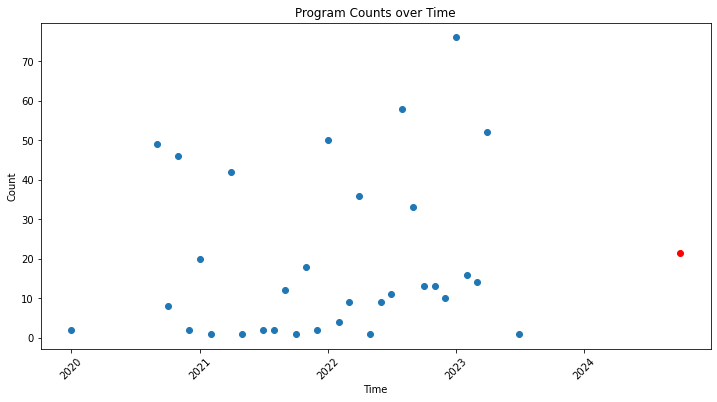

In [143]:
program_counts['date'] = pd.to_datetime(program_counts[['year', 'month']].assign(day=1))
grouped_data = program_counts.groupby('date')


# Creating scatter plot
plt.figure(figsize=(12, 6))

group = group.sort_values(['year', 'month'])
x_values = pd.to_datetime(group['year'].astype(str) + '-' + group['month'].astype(str), format='%Y-%m')
plt.scatter(grouped_data.count().index, grouped_data.count()['count'])

plt.xlabel('Time')
plt.ylabel('Count')

plt.title('Program Counts over Time')

plt.xticks(rotation=45)

# Plot the predicted value
plt.plot(sample_date, forecast.iloc[-1], marker="o", color="red")

plt.show()

In [ ]:
# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 0))
model_fit = model.fit()

# Forecast the future values
future_periods = 12  # Number of periods to forecast
forecast = model_fit.forecast(steps=future_periods)

# Print the forecasted values
print(forecast)

# Spacer

In [27]:
test_x['date'] = pd.to_datetime(test_x[['year', 'month']].assign(day=1))
test_x.set_index('date', inplace=True)

test_x

NameError: name 'test_x' is not defined

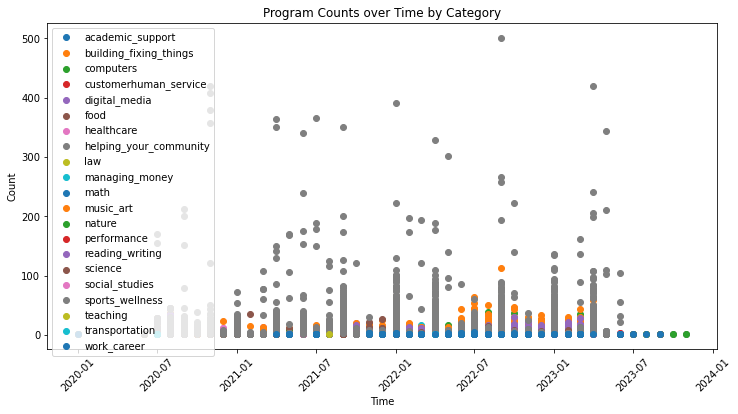

In [9]:
grouped_data = program_counts.groupby('category_name')

plt.figure(figsize=(12, 6))

for category, group in grouped_data:
    group = group.sort_values(['year', 'month'])  # Sort by year and month
    
    # Generate the x-axis values using year and month
    x_values = pd.to_datetime(group['year'].astype(str) + '-' + group['month'].astype(str), format='%Y-%m')
    
    plt.scatter(x_values, group['count'], label=category)

plt.xlabel('Time')
plt.ylabel('Count')

plt.title('Program Counts over Time by Category')

plt.xticks(rotation=45)
plt.legend()
plt.show()



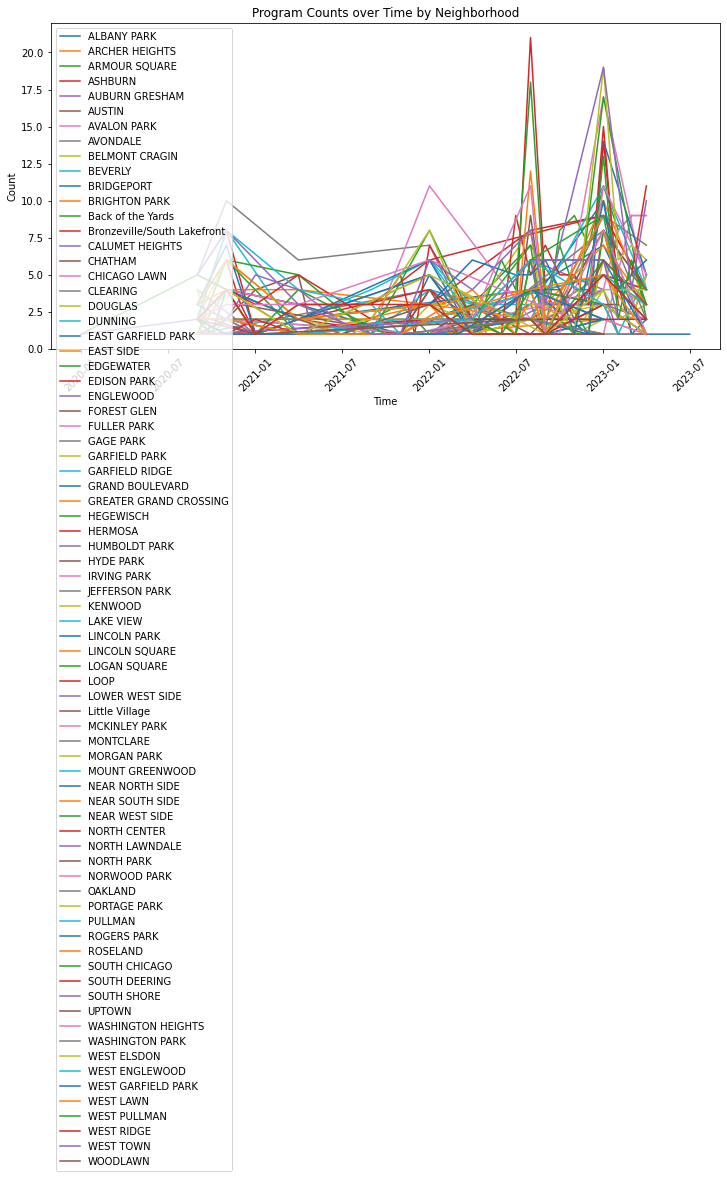

In [26]:
grouped_data = program_counts.groupby('geographic_cluster_name')

plt.figure(figsize=(12, 6))

for category, group in grouped_data:
    group = group.sort_values(['year', 'month'])  # Sort by year and month
    
    # Generate the x-axis values using year and month
    x_values = pd.to_datetime(group['year'].astype(str) + '-' + group['month'].astype(str), format='%Y-%m')
    
    plt.plot(x_values, group['count'], label=category)

plt.xlabel('Time')
plt.ylabel('Count')

plt.title('Program Counts over Time by Neighborhood')

plt.xticks(rotation=45)
plt.legend()
plt.show()

### Training

In [114]:
features = ['category_name']
program_counts = count_programs_by_features(train_data, features)
print(program_counts)

        category_name  month  year  count
0    academic_support      1  2020      2
1    academic_support      1  2021     23
2    academic_support      1  2022    143
3    academic_support      1  2023    373
4    academic_support      2  2021      1
..                ...    ...   ...    ...
469       work_career     10  2022     12
470       work_career     11  2021      9
471       work_career     11  2022      8
472       work_career     12  2021      5
473       work_career     12  2022      1

[474 rows x 4 columns]


In [118]:
program_counts_df = pd.DataFrame(program_counts)
program_counts_df

,category_name,month,year,count
0,academic_support,1,2020,2
1,academic_support,1,2021,23
2,academic_support,1,2022,143
3,academic_support,1,2023,373
4,academic_support,2,2021,1
...,...,...,...,...
469,work_career,10,2022,12
470,work_career,11,2021,9
471,work_career,11,2022,8
472,work_career,12,2021,5


In [120]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Convert 'month' and 'year' columns to datetime
program_counts_df['date'] = pd.to_datetime(program_counts_df[['year', 'month']].assign(day=1))

# Set the 'date' column as the index
program_counts_df.set_index('date', inplace=True)

# Sort the dataframe based on the index
program_counts_df.sort_index(inplace=True)

# Prepare the training data
train_data = program_counts_df['count']

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 0))
model_fit = model.fit()

# Forecast the future values
future_periods = 12  # Number of periods to forecast
forecast = model_fit.forecast(steps=future_periods)

# Print the forecasted values
print(forecast)


474    1.0
475    1.0
476    1.0
477    1.0
478    1.0
479    1.0
480    1.0
481    1.0
482    1.0
483    1.0
484    1.0
485    1.0
Name: predicted_mean, dtype: float64


C:\Users\cathy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cathy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cathy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cathy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [134]:
features = ['category_name']
program_counts_test = count_programs_by_features(test_data, features)
print(program_counts_test)

        category_name  month  year  count
0    academic_support      1  2021      7
1    academic_support      1  2022     34
2    academic_support      1  2023     84
3    academic_support      2  2022      2
4    academic_support      2  2023     10
..                ...    ...   ...    ...
366       work_career     10  2022      4
367       work_career     11  2021      4
368       work_career     11  2022      1
369       work_career     12  2021      2
370       work_career     12  2022      2

[371 rows x 4 columns]


In [138]:
program_counts_test['date'] = pd.to_datetime(program_counts_test[['year', 'month']].assign(day=1))
program_counts_test.set_index('date', inplace=True)
program_counts_test.head()

,category_name,month,year,count
date,,,,
2021-01-01,academic_support,1,2021,7
2022-01-01,academic_support,1,2022,34
2023-01-01,academic_support,1,2023,84
2022-02-01,academic_support,2,2022,2
2023-02-01,academic_support,2,2023,10


In [139]:
test_y = program_counts_test['count']
test_x = program_counts_test[['category_name','month','year']]

In [29]:
import datetime
datetime.date(2023, 10, 1)

datetime.date(2023, 10, 1)

In [76]:
sample_date = datetime.date(2024, 10, 1)
sample_df = pd.DataFrame({'category_name':'academic_support',
                          'month':10,
                          'year':2023},
                         index=[sample_date])

sample_df.index.name = 'date'
sample_df

,category_name,month,year
date,,,
2024-10-01,academic_support,10,2023


In [ ]:
forecast = model_fit.forecast(steps=len(test_x))

In [140]:
test_x

,category_name,month,year
date,,,
2021-01-01,academic_support,1,2021
2022-01-01,academic_support,1,2022
2023-01-01,academic_support,1,2023
2022-02-01,academic_support,2,2022
2023-02-01,academic_support,2,2023
...,...,...,...
2022-10-01,work_career,10,2022
2021-11-01,work_career,11,2021
2022-11-01,work_career,11,2022


In [141]:
test_x['date'] = pd.to_datetime(test_x[['year', 'month']].assign(day=1))
test_x.set_index('date', inplace=True)


In [142]:
forecast = model_fit.forecast(steps=len(test_x))


C:\Users\cathy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [143]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_y, forecast)
print("MAE:", mae)

MAE: 38.23719676549865
